<a id="toc"></a>

# <p style="background-color: #008080; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:5px 5px;">Auto Scout Car Prices Prediction Project: <br> Data Cleaning</p>

## <p style="background-color: #008080; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Content</p>

* [INTRODUCTION NOTEBOOK](00_introduction.ipynb)
* [IMPORTING LIBRARIES](#1)
* [DATA CLEANING COLUMN BY COLUMN](#2)
* [THE END OF DATA CLEANING](#3)

<a id="1"></a>

## Importing Libraries

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
from time import perf_counter

<a id="1"></a>
## Data Cleaning


### Import JSON file

Observations:
1. The data is in json lines format - each line is a dictionary.
2. This format seems to be very efficient, since the notepad++ file is able to open and view this version of the file. 
3. When I saved the usual 'record' oriented json format the file is too unweildy for notepad++ to allow opening and viewing.

In [2]:
t0 = perf_counter()
df = pd.read_json('scout_car.json', lines=True)
t1 = perf_counter()
print(f'{t1 - t0} s')

1.2994467000000003 s


### Fix names: 
1. make all names lowercase
2. remove 'of ', 'nr ', '.', and '&'
3. remove trailing spaces and newline characters
4. replace internal space(s) with underscore

In [3]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [4]:
new_cols = {}
for c in df.columns:
    c1 = c.lower()
    c1 = re.sub('\.|&|of ','',c1)
    c1 = c1.strip()
    c1 = re.sub('\s+|-','_',c1)
    #print(c1)
    new_cols[c] = c1

In [5]:
df.rename(columns=new_cols, inplace=True)

In [6]:
df.to_json('data.json', orient='records', lines=False)

In [7]:
t0 = perf_counter()
df2 = pd.read_json('data.json', orient='records', lines=False)
t1 = perf_counter()
print(f'{t1-t0} s')

1.1343912000000005 s


json(l) and json not lines are both are efficient to store and open using pandas, 1.3s vs 1.1s.

json will not open in notepad++, while json(l) will. 

In [8]:
cols = [i for i in df.columns]
print(cols)

['url', 'make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'kw', 'hp', 'type', 'previous_owners', 'next_inspection', 'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle', 'null', 'make', 'model', 'offer_number', 'first_registration', 'body_color', 'paint_type', 'body_color_original', 'upholstery', 'body', 'nr_doors', 'nr_seats', 'model_code', 'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class', 'comfort_convenience', 'entertainment_media', 'extras', 'safety_security', 'description', 'emission_label', 'gears', 'country_version', 'electricity_consumption', 'last_service_date', 'other_fuel_types', 'availability', 'last_timing_belt_service_date', 'available_from']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kw                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  type                           15917 non-null  object 
 12  previous_owners                9279 non-null  

In [10]:
missing = {}
for i,c in enumerate(cols):
    m = df[c].count()
    missing[c] = (i, m)
missing = [(missing[k][0], k, missing[k][1]) for k in missing.keys()]
missing.sort(key = lambda t: -1*t[2])
print('index\tn_notNA\tCol_Name')
for c in missing:    
    print(f'{c[0]}\t{c[2]}\t{c[1]}')

index	n_notNA	Col_Name
0	15919	url
1	15919	make_model
4	15919	price
6	15919	km
7	15919	registration
10	15919	hp
18	15919	null
19	15919	make
20	15919	model
31	15919	gearing_type
36	15919	fuel
44	15919	description
11	15917	type
2	15873	short_description
3	15859	body_type
27	15859	body
28	15707	nr_doors
32	15423	displacement
23	15322	body_color
40	14999	comfort_convenience
29	14942	nr_seats
43	14937	safety_security
41	14545	entertainment_media
22	14322	first_registration
38	14111	co2_emission
37	14013	consumption
42	12957	extras
39	12898	emission_class
21	12744	offer_number
26	12199	upholstery
25	12160	body_color_original
5	11406	vat
46	11207	gears
15	10499	warranty
33	10239	cylinders
24	10147	paint_type
12	9279	previous_owners
8	9091	prev_owner
35	9061	drive_chain
34	8945	weight
16	8215	full_service
47	7586	country_version
17	7177	non_smoking_vehicle
30	4978	model_code
45	3985	emission_label
14	3932	inspection_new
13	3535	next_inspection
50	880	other_fuel_types
51	635	availability
49	566

### Features Lists

ignore is a list of features that can be ignored.

to_encode is a list of features that need to be made into dummy variables during analysis

In [11]:
ignore = set()
to_encode = set()

In [12]:
ignore.add('kw')
ignore.add('last_timing_belt_service_date')

### Explore electricity_consumption 

n = 137

same entry of [\n0 kWh/100 km (comb)\n] all 137 times it occurs. 

In [13]:
df['electricity_consumption'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n0 kWh/100 km (comb)\n]    137
Name: electricity_consumption, dtype: int64

In [14]:
ignore.add('electricity_consumption')

### Explore available_from

* n = 272
* dates in dd/mm/yy format
* ignore available_from

In [15]:
df['available_from'].value_counts()

\n31/08/19\n    98
\n30/07/19\n    25
\n15/08/19\n    24
\n16/09/19\n    14
\n29/06/19\n    12
\n01/07/19\n    11
\n28/06/19\n    10
\n19/08/19\n     7
\n10/09/19\n     6
\n26/06/19\n     5
\n27/06/19\n     5
\n10/11/19\n     5
\n08/07/19\n     4
\n25/10/19\n     3
\n15/07/19\n     3
\n01/08/19\n     3
\n04/07/19\n     2
\n05/08/19\n     2
\n24/08/19\n     2
\n16/07/19\n     2
\n20/07/19\n     2
\n05/07/19\n     2
\n30/06/19\n     2
\n30/09/19\n     1
\n31/10/19\n     1
\n27/07/19\n     1
\n02/07/19\n     1
\n10/07/19\n     1
\n19/07/19\n     1
\n24/07/19\n     1
\n29/07/19\n     1
\n29/09/19\n     1
\n18/08/19\n     1
\n14/09/19\n     1
\n18/07/19\n     1
\n16/08/19\n     1
\n24/09/19\n     1
\n17/08/19\n     1
\n10/10/19\n     1
\n06/12/19\n     1
\n03/12/19\n     1
\n05/12/19\n     1
\n11/08/19\n     1
\n10/12/19\n     1
\n01/09/19\n     1
\n03/08/19\n     1
Name: available_from, dtype: int64

In [16]:
ignore.add("available_from")

### Explore availability 

* n = 635/16,000
* ignore availability

In [17]:
df['availability'].value_counts()

\nin 90 days from ordering\n     196
\nin 120 days from ordering\n    182
\nin 1 day from ordering\n        51
\nin 5 days from ordering\n       35
\nin 3 days from ordering\n       35
\nin 180 days from ordering\n     24
\nin 14 days from ordering\n      24
\nin 7 days from ordering\n       20
\nin 150 days from ordering\n     18
\nin 2 days from ordering\n       16
\nin 60 days from ordering\n      13
\nin 42 days from ordering\n      10
\nin 21 days from ordering\n       8
\nin 4 days from ordering\n        2
\nin 6 days from ordering\n        1
Name: availability, dtype: int64

In [18]:
ignore.add("availability")

###  Explore last_service_date 

* n = 566 compared to ~16000
* mostly lists, seems to have the i=0 of last service data in the format mm/yy, buy also have other features mixed up. Once in a while a non-list
* Euro 6 seems to be "emission_class" in a handful of cases (5-6) these seem to have been placed in last_service_date column instead of "emission_class". Repeated information. Can be ignored.
* and C02/km is "co2_emission". Repeated information. Can be ignored. 
* Sometimes color (Green) (Blue). Repeated information. Can be ignored.
* last_service_date may be ignored

In [19]:
df['last_service_date'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n02/2019\n, \nEuro 6\n]                 23
[\n05/2019\n, \nEuro 6\n]                 16
[\n01/2018\n, \n118 g CO2/km (comb)\n]    15
[\n03/2019\n, \nEuro 6\n]                 15
[\n06/2019\n, \nEuro 6\n]                 13
                                          ..
[\n01/2017\n, \n95 g CO2/km (comb)\n]      1
[\n06/2019\n, \n87 g CO2/km (comb)\n]      1
[\n10/2018\n, \n100 g CO2/km (comb)\n]     1
[\n02/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2019\n, \n120 g CO2/km (comb)\n]     1
Name: last_service_date, Length: 266, dtype: int64

In [20]:
lsd_vc = df['last_service_date'].value_counts()
lsd_vc

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n02/2019\n, \nEuro 6\n]                 23
[\n05/2019\n, \nEuro 6\n]                 16
[\n01/2018\n, \n118 g CO2/km (comb)\n]    15
[\n03/2019\n, \nEuro 6\n]                 15
[\n06/2019\n, \nEuro 6\n]                 13
                                          ..
[\n01/2017\n, \n95 g CO2/km (comb)\n]      1
[\n06/2019\n, \n87 g CO2/km (comb)\n]      1
[\n10/2018\n, \n100 g CO2/km (comb)\n]     1
[\n02/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2019\n, \n120 g CO2/km (comb)\n]     1
Name: last_service_date, Length: 266, dtype: int64

In [21]:
lsd_vc_index = [i for i in lsd_vc.index]
lsd_vc_index

[['\n02/2019\n', '\nEuro 6\n'],
 ['\n05/2019\n', '\nEuro 6\n'],
 ['\n01/2018\n', '\n118 g CO2/km (comb)\n'],
 ['\n03/2019\n', '\nEuro 6\n'],
 ['\n06/2019\n', '\nEuro 6\n'],
 ['\n04/2019\n', '\nEuro 6\n'],
 ['\n01/2019\n', '\nEuro 6\n'],
 ['\n12/2018\n', '\nEuro 6\n'],
 ['\n10/2018\n', '\nEuro 6\n'],
 '\n02/2019\n',
 ['\n05/2018\n', '\nEuro 6\n'],
 ['\n11/2018\n', '\nEuro 6\n'],
 ['\n05/2019\n', '\n120 g CO2/km (comb)\n'],
 ['\n09/2018\n', '\nEuro 6\n'],
 ['\n08/2018\n', '\nEuro 6\n'],
 ['\n06/2018\n', '\nEuro 6\n'],
 '\n12/2018\n',
 '\n05/2019\n',
 ['\n04/2018\n', '\nEuro 6\n'],
 ['\n12/2018\n'],
 '\n03/2019\n',
 ['\n05/2019\n', '\n127 g CO2/km (comb)\n'],
 ['\n01/2019\n', '\n120 g CO2/km (comb)\n'],
 ['\n06/2019\n', '\n104 g CO2/km (comb)\n'],
 ['\n01/2019\n'],
 ['\n07/2018\n', '\nEuro 6\n'],
 ['\n06/2017\n', '\n114 g CO2/km (comb)\n'],
 '\n04/2019\n',
 '\n07/2018\n',
 ['\n03/2019\n', '\n99 g CO2/km (comb)\n'],
 '\n06/2018\n',
 ['\n04/2019\n'],
 ['\n01/2019\n', '\n127 g CO2/km (comb)\

In [22]:
df['emission_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [23]:
df['last_service_date'][df['emission_class'].isna()].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n01/2018\n, \n118 g CO2/km (comb)\n]                                                             15
[\n05/2017\n, \n118 g CO2/km (comb)\n]                                                              3
[\n05/2018\n, \n130 g CO2/km (comb)\n]                                                              3
[\n02/2017\n, \n102 g CO2/km (comb)\n]                                                              3
[\n12/2018\n]                                                                                       3
[\n06/2017\n, \n114 g CO2/km (comb)\n]                                                              3
[\n01/2019\n, \n127 g CO2/km (comb)\n]                                                              2
[\n02/2019\n]                                                                                       2
[\n04/2019\n]                                                                                       2
[\n06/2019\n, \nEuro 6\n]                                                         

In [24]:
df['co2_emission'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n120 g CO2/km (comb)\n]      740
[[], [], []]                   628
[\n99 g CO2/km (comb)\n]       545
[\n97 g CO2/km (comb)\n]       537
[\n104 g CO2/km (comb)\n]      501
                              ... 
[\n14 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]      1
[\n51 g CO2/km (comb)\n]         1
[\n165 g CO2/km (comb)\n]        1
[\n193 g CO2/km (comb)\n]        1
Name: co2_emission, Length: 123, dtype: int64

In [25]:
df['last_service_date'][df['co2_emission'].isna()].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n04/2019\n]                4
[\n01/2019\n]                4
[\n12/2018\n]                3
[\n02/2019\n]                3
[\n09/2018\n]                2
[\n11/2018\n]                2
\n05/2019\n                  1
[\n06/2019\n]                1
[\n12/2018\n, \nEuro 6\n]    1
[\n07/2018\n]                1
[\n09/2018\n, \nEuro 6\n]    1
Name: last_service_date, dtype: int64

In [26]:
ignore.add('last_service_date')

### Exlore 'other_fuel_types'

Empty lists, can be ignored.

In [27]:
df['other_fuel_types'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[], [], []]    880
Name: other_fuel_types, dtype: int64

In [28]:
ignore.add('other_fuel_types')

### Explore 'next_inspection' 

* n = 3535
* most often mm/yyyy entry. Sometimes repeated c02_emission or emission_label. Not much new information. 

In [29]:
df['next_inspection'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n04/2022\n                               62
\n03/2021\n                               38
\n03/2022\n                               36
\n06/2021\n                               34
\n01/2022\n                               32
                                          ..
[\n12/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2022\n, \n1 (No sticker)\n]          1
[\n05/2021\n, \n93 g CO2/km (comb)\n]      1
[\n06/2021\n, \n93 g CO2/km (comb)\n]      1
[\n01/2022\n, \n168 g CO2/km (comb)\n]     1
Name: next_inspection, Length: 1399, dtype: int64

In [30]:
df['next_inspection'][df['co2_emission'].isna()].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n06/2021\n, \n4 (Green)\n]    20
[\n05/2021\n, \n4 (Green)\n]    14
[\n06/2021\n]                   13
[\n03/2021\n, \n4 (Green)\n]    11
[\n06/2021\n, \nEuro 6\n]        7
                                ..
[\n11/2019\n, \nEuro 6\n]        1
[\n10/2019\n, \n4 (Green)\n]     1
\n07/2017\n                      1
[\n02/2021\n, \nEuro 6c\n]       1
[\n10/2020\n]                    1
Name: next_inspection, Length: 82, dtype: int64

In [31]:
df['next_inspection'][df['co2_emission'].isna()].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n06/2021\n, \n4 (Green)\n]    20
[\n05/2021\n, \n4 (Green)\n]    14
[\n06/2021\n]                   13
[\n03/2021\n, \n4 (Green)\n]    11
[\n06/2021\n, \nEuro 6\n]        7
[\n02/2021\n, \n4 (Green)\n]     6
[\n06/2019\n, \n4 (Green)\n]     6
[\n01/2021\n, \n4 (Green)\n]     6
[\n03/2020\n, \n4 (Green)\n]     6
[\n03/2019\n, \n4 (Green)\n]     5
\n03/2022\n                      5
\n10/2018\n                      4
[\n04/2021\n, \n4 (Green)\n]     4
[\n02/2019\n, \n4 (Green)\n]     4
[\n05/2019\n, \n4 (Green)\n]     4
[\n04/2019\n, \n4 (Green)\n]     4
\n02/2020\n                      3
[\n07/2020\n, \n4 (Green)\n]     3
[\n06/2020\n, \n4 (Green)\n]     3
\n03/2017\n                      3
\n07/2021\n                      3
[\n02/2020\n, \n4 (Green)\n]     3
\n06/2021\n                      3
[\n02/2021\n, \nEuro 6\n]        3
[\n10/2020\n, \n4 (Green)\n]     3
\n03/2021\n                      3
\n02/2021\n                      2
[\n07/2019\n, \n4 (Green)\n]     2
\n04/2017\n         

In [32]:
df['next_inspection'][df['emission_label'].isna()].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n04/2022\n                               35
\n03/2021\n                               31
\n01/2022\n                               30
\n03/2022\n                               29
\n04/2021\n                               26
\n06/2021\n                               25
\n05/2021\n                               24
\n05/2022\n                               24
\n05/2019\n                               23
[\n06/2021\n, \n97 g CO2/km (comb)\n]     22
[\n06/2021\n, \nEuro 6\n]                 21
[\n06/2021\n, \n119 g CO2/km (comb)\n]    21
\n03/2020\n                               20
\n01/2023\n                               19
[\n06/2021\n, \n102 g CO2/km (comb)\n]    18
[\n05/2021\n, \n108 g CO2/km (comb)\n]    15
\n02/2021\n                               15
[\n06/2021\n, \n99 g CO2/km (comb)\n]     15
\n02/2022\n                               14
\n02/2020\n                               14
\n06/2022\n                               14
\n09/2021\n                               14
\n07/2019\

In [33]:
ignore.add('next_inspection')

### Explore 'inspection_new'. 

* N = 3932
* Mostly lists, index 0 has 'Yes'. Can we assume missing is 'No'?
* inspection_new can be ignored

In [34]:
df['inspection_new'].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
[\nYes\n, \n97 g CO2/km (comb)\n]                                                               89
[\nYes\n, \n0 kWh/100 km (comb)\n]                                                              86
[\nYes\n, \n119 g CO2/km (comb)\n]                                                              84
[\nYes\n, \n128 g CO2/km (comb)\n]                                                              81
[\nYes\n]                                                                                       80
[\nYes\n, 

In [35]:
df['inspection_new'] = [re.sub('\n','',x[0]) if x.__class__ == list else x for x in df['inspection_new']]

In [36]:
df['inspection_new'] = [re.sub('\n','',x) if x.__class__ == str else x for x in df['inspection_new']]

In [37]:
df['inspection_new'].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [38]:
df['inspection_new'][df['co2_emission'].isna()].value_counts()[:50]
# no new co2_emission information

Yes    252
Name: inspection_new, dtype: int64

In [39]:
df['next_inspection'][df['inspection_new'].isna()].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                9327
\n04/2022\n                                                                                          60
\n03/2021\n                                                                                          37
\n03/2022\n                                                                                          35
\n01/2022\n                                                                                          31
                                                                                                   ... 
[\n02/2022\n, \n160 g CO2/km (comb)\n]                                                                1
[\n02/2022\n, \n130 g CO2/km (comb)\n]                                                                1
[\n03/2022\n, \n, 6.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]       1
[\n01/2022\n, \n, 6.1 l/100 km (comb), \n, 7.5 l/100 km (city), 

In [40]:
df['inspection_new'][df['type'].notna()].value_counts()
# no new information about new/used

Yes    3932
Name: inspection_new, dtype: int64

In [41]:
ignore.add('inspection_new')

### Explore 'emission_label'
* n = 3985

In [42]:
df['emission_label'].notna().sum()

3985

In [43]:
df['emission_label'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [44]:
ignore.add('emission_label')

### Explore 'model_code' 

* n = 5000 or so.
* model_code can be ignored

In [45]:
df['model_code'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n0035/BCB\n]    268
[\n0588/BNO\n]    245
[\n0588/BDB\n]    206
[\n0588/BHX\n]    188
[\n1844/ADJ\n]    175
                 ... 
[\n0000/ACP\n]      1
[\n0035/BGY\n]      1
[\n0035/bgp\n]      1
[\n0035/BGS\n]      1
[\n3333/BKG\n]      1
Name: model_code, Length: 232, dtype: int64

In [46]:
ignore.add('model_code')

### Explore 'non-smoking_vehicle' 
* n ~ 7200
* Lists empty at i = 0, 1
* no new imformation

In [47]:
df['non_smoking_vehicle'].value_counts()[50:]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n, \n136 g CO2/km (comb)\n]                                                             3
[\n, \n, \n110 g CO2/km (comb)\n]                                                             3
[\n, \n, \n148 g CO2/km (comb)\n]                                                             3
[\n, \n, \n157 g CO2/km (comb)\n]                                                             3
[\n, \n, \n95 g CO2/km (comb)\n]                                                              3
[\n, \n, \n119 g CO2/km (comb)\n]                                                             3
[\n, \n, \n149 g CO2/km (comb)\n]                                                             3
[\n, \n, \n166 g CO2/km (comb)\n]                                                             2
[\n, \n, \n138 g CO2/km (comb)\n]                                                             2
[\n, \n, \n121 g CO2/km (comb)\n]                                                             2
[\n, \n, \n111 g CO2/km (comb)\n]       

In [48]:
ignore.add('non_smoking_vehicle')

### Explore 'country_version'

* n ~ 7500
* We should not ignore this.
* We can make this a binary of country_version with True or False for most frequent countries.
* Why is this infomation missing for 8333 cars? 
* No pattern in missing data by make, registration or first_registration, .
* When encoding, we will not consider any countries with freq. less than 100. Club these into 'other'

In [49]:
df['country_version'] = [x[0].strip() if x.__class__ == list else x for x in df['country_version'] ]
df['country_version'].value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

In [50]:
to_encode.add('country_version')

### Explore 'make'

* no missing values

In [51]:
df['make'] = [x.strip() if x.__class__ == str else x for x in df['make'] ]
df['make'].value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [52]:
df['make'][df['country_version'].isna()].value_counts()

Opel       3518
Audi       3280
Renault    1535
Name: make, dtype: int64

In [53]:
df['first_registration'] = [int(x[1].strip()) if x.__class__ == list else x for x in df['first_registration']]
df['first_registration'].value_counts()

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
Name: first_registration, dtype: int64

In [54]:
df['first_registration'][df['country_version'].isna()].value_counts()

2018.0    2344
2016.0    2154
2017.0    2074
2019.0    1365
Name: first_registration, dtype: int64

<AxesSubplot:>

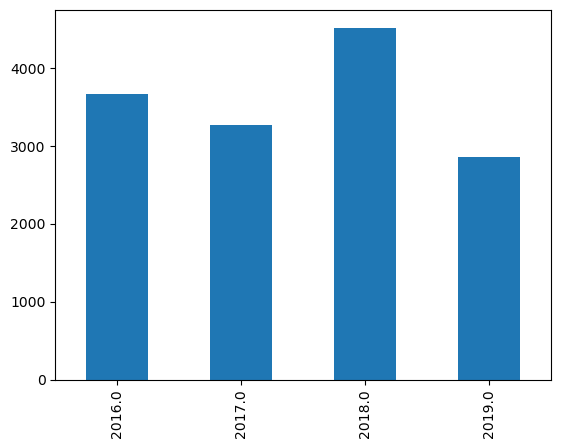

In [55]:
reg_freq = df['first_registration'].value_counts().sort_index()
reg_freq.plot.bar()

<AxesSubplot:>

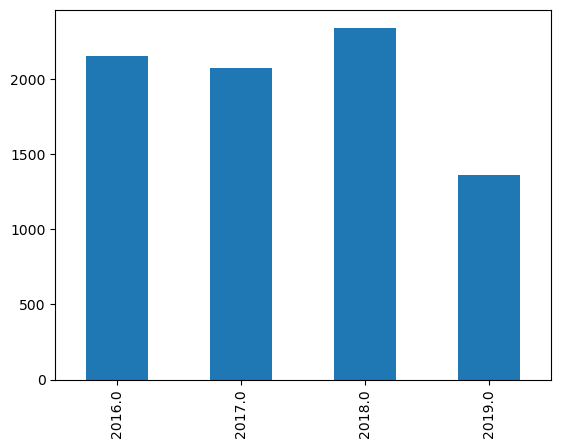

In [56]:
reg_freq = df['first_registration'][df['country_version'].isna()].value_counts().sort_index()
reg_freq.plot.bar()

### Explore 'full_service', 

* n ~ 8200
* Seems to be lists with missing values in i = 0, 1
* We can ignore this feature

In [57]:
df['full_service'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
\n                                                                                             283
                                                                                              ... 
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n87 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 5.7 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n, \n, \

In [58]:
ignore.add('full_service')

### Explore 'weight' 

* n = ~9000
* format is [\n"num kg"\n], num has "," after thousands place
* Why is this information missing for many cars? 
* Maybe we can fill this when missing by average of weight by model_make

In [59]:
df['weight'].isna().sum()

6974

In [60]:
df['weight'].value_counts()[100:150]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,635 kg\n]    20
[\n1,198 kg\n]    19
[\n1,890 kg\n]    19
[\n1,370 kg\n]    19
[\n1,225 kg\n]    19
[\n1,582 kg\n]    19
[\n1,310 kg\n]    18
[\n1,537 kg\n]    18
[\n1,655 kg\n]    17
[\n1,843 kg\n]    16
[\n1,400 kg\n]    16
[\n1,518 kg\n]    16
[\n1,540 kg\n]    16
[\n1,380 kg\n]    15
[\n1,055 kg\n]    15
[\n1,760 kg\n]    15
[\n1,235 kg\n]    15
[\n2,353 kg\n]    15
[\n1,510 kg\n]    14
[\n1,708 kg\n]    14
[\n1,596 kg\n]    14
[\n1,305 kg\n]    14
[\n1,640 kg\n]    14
[\n1,270 kg\n]    13
[\n1,815 kg\n]    13
[\n1,079 kg\n]    13
[\n1,630 kg\n]    13
[\n1,758 kg\n]    13
[\n1,340 kg\n]    12
[\n2,300 kg\n]    12
[\n1,240 kg\n]    12
[\n1,378 kg\n]    12
[\n1,100 kg\n]    12
[\n1,214 kg\n]    12
[\n1,647 kg\n]    11
[\n980 kg\n]      11
[\n1,234 kg\n]    11
[\n1,684 kg\n]    11
[\n1,717 kg\n]    11
[\n1,175 kg\n]    11
[\n1,035 kg\n]    11
[\n1,140 kg\n]    11
[\n1,156 kg\n]    10
[\n1,567 kg\n]    10
[\n1,485 kg\n]    10
[\n1,295 kg\n]    10
[\n1,203 kg\n]    10
[\n1,082 kg\n

<AxesSubplot:ylabel='Frequency'>

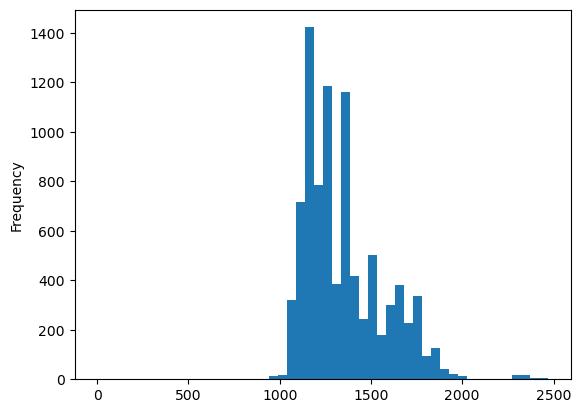

In [61]:
df['weight'] = [int(re.sub('kg|,','',x[0]).strip()) if x.__class__ == list else float('nan') for x in df['weight']]
df['weight'].plot.hist(bins=50)

In [62]:
df['weight'][df['weight']<1000].count()

18

<AxesSubplot:ylabel='Frequency'>

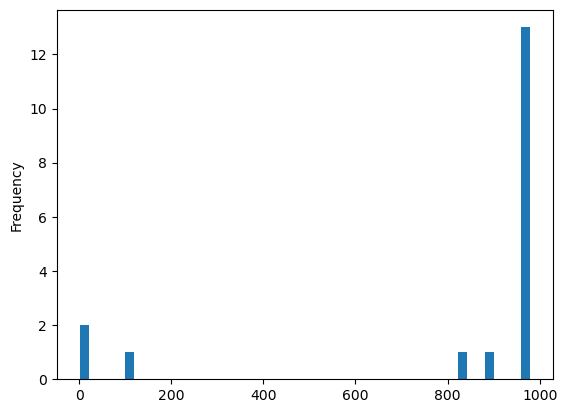

In [63]:
df['weight'][df['weight']<1000].plot.hist(bins=50)

In [64]:
df['weight'][df['weight']>2000].count()

54

<AxesSubplot:ylabel='Frequency'>

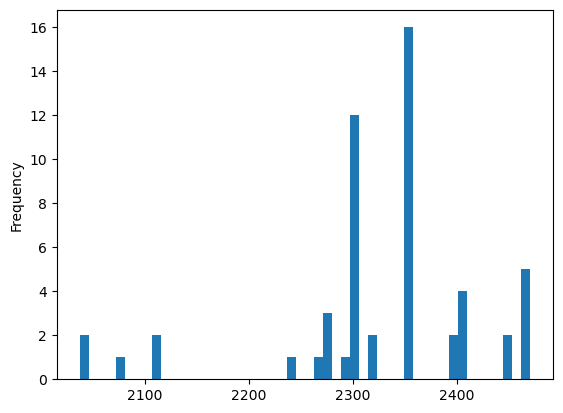

In [65]:
df['weight'][df['weight']>2000].plot.hist(bins=50)

In [66]:
wts = df[['weight']].groupby(df['make_model'],dropna=True).mean(numeric_only=True)
name_wts = {name:wts.loc[name][0] for name in wts.index}
name_wts

{'Audi A1': 1229.0899107755663,
 'Audi A2': nan,
 'Audi A3': 1384.510994764398,
 'Opel Astra': 1361.4719367588932,
 'Opel Corsa': 1172.6988727858293,
 'Opel Insignia': 1588.5308550185873,
 'Renault Clio': 1167.7597234226448,
 'Renault Duster': nan,
 'Renault Espace': 1729.3884007029876}

### Explore 'drive_chain'
* 6858 missing values
* when imputing we can infer the drive chain based on mode of 'make_model'
* we will encode this variable when we do data analysis, put in the to_encode set.

In [67]:
df['drive_chain'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [68]:
df['drive_chain'] = [x[0].strip() if x.__class__ == list else x for x in df['drive_chain']]
df['drive_chain'].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [69]:
df['drive_chain'].groupby(df['make_model']).value_counts(dropna=False)

make_model      drive_chain
Audi A1         front          1693
                NaN             918
                4WD               3
Audi A2         front             1
Audi A3         front          2008
                NaN            1070
                4WD              19
Opel Astra      front          1346
                NaN            1178
                4WD               2
Opel Corsa      front          1170
                NaN            1049
Opel Insignia   front          1409
                NaN            1092
                4WD              94
                rear              3
Renault Clio    NaN            1032
                front           795
                4WD              11
                rear              1
Renault Duster  NaN              32
                4WD               2
Renault Espace  NaN             487
                front           464
                4WD              40
Name: drive_chain, dtype: int64

In [70]:
to_encode.add('drive_chain')

### Explore prev_owner, previous_owners, type

* prev_owner is derived from previous_owners after cleaning, except no 0 previous owners
* there are cases where there is information in previous_owners not in prev_owner and vice-versa.
* similar information is also avialable in 'type'.
* when imputing I will have to consider these three variables together. 
* I will keep prev_owner and ignore previous_owners

In [71]:
df['prev_owner'].value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [72]:
df['previous_owners'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
[\n1\n, \n168 g CO2/km (comb)\n]                                                               13
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n1\n, \n142 g CO2/

In [73]:
df['previous_owners'] = [re.sub(r'[A-Za-z]','',x[0]) if x.__class__ == list else x for x in df['previous_owners']]
df['previous_owners'] = [x.strip() if x.__class__ == str else x for x in df['previous_owners']]
df['previous_owners'].value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [74]:
df['type'] = [x[1].strip() if x.__class__ == list else x for x in df['type']]
df['type'].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [75]:
df['previous_owners'][df['type'] == 'Used'].value_counts(dropna=False)

1      6291
NaN    4010
2       756
0        20
3        17
4         2
Name: previous_owners, dtype: int64

In [76]:
df['prev_owner'][df['type'] != 'New'].value_counts(dropna=False)

1 previous owner     8279
NaN                  5193
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [77]:
df['prev_owner'] = [re.sub(r'[A-Za-z]','',x) if x.__class__ == str else x for x in df['prev_owner']]

In [78]:
to_encode.add('prev_owner')
ignore.add('previous_owners')

### Explore 'type'

* replace the entries to all lowercase
* when using this for modeling, I will encode this feature

In [79]:
df['type'] = [re.sub('-|\s','_',x.lower()) if x.__class__ == str else x for x in df['type']]
df['type'] = [re.sub('\'','',x.lower()) if x.__class__ == str else x for x in df['type']]

In [80]:
df['type'].value_counts(dropna=False)

used              11096
new                1650
pre_registered     1364
employees_car      1011
demonstration       796
NaN                   2
Name: type, dtype: int64

In [81]:
to_encode.add('type')

### Explore 'paint_type'

* 5772 missing values
* when imputing we can infer from color and make_model

In [82]:
df['paint_type'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [83]:
df['paint_type'] = [x[0].strip() if x.__class__ == list else x for x in df['paint_type']]
df['paint_type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [84]:
df['paint_type'].groupby(df['make_model']).value_counts(dropna=False)

make_model      paint_type 
Audi A1         Metallic       1742
                NaN             808
                Uni/basic        63
                Perl effect       1
Audi A2         Metallic          1
Audi A3         Metallic       1792
                NaN            1208
                Uni/basic        97
Opel Astra      Metallic       1713
                NaN             785
                Uni/basic        26
                Perl effect       2
Opel Corsa      Metallic       1281
                NaN             883
                Uni/basic        53
                Perl effect       2
Opel Insignia   Metallic       1780
                NaN             795
                Uni/basic        23
Renault Clio    NaN             925
                Metallic        861
                Uni/basic        52
                Perl effect       1
Renault Duster  NaN              17
                Uni/basic        16
                Metallic          1
Renault Espace  Metallic        623


In [85]:
to_encode.add('paint_type')

### Explore 'cylinders'
* 5680 missing values
* Maybe we can infer the missing values from from make_model, hp, etc.
* we can group these into "more than 4" and "less than 3" to encode into 2 features. 

In [86]:
df['cylinders'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [87]:
df['cylinders'] = [x[0].strip().lstrip() if x.__class__ == list else x for x in df['cylinders']]
df['cylinders'].value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [88]:
df['cylinders'].groupby(df['make_model']).value_counts(dropna=False)

make_model      cylinders
Audi A1         3            1358
                NaN           859
                4             396
                8               1
Audi A2         NaN             1
Audi A3         4            1900
                NaN           803
                3             373
                5              21
Opel Astra      4            1244
                NaN          1106
                3             176
Opel Corsa      4            1391
                NaN           818
                3               9
                1               1
Opel Insignia   4            1629
                NaN           965
                6               3
                2               1
Renault Clio    4             872
                NaN           778
                3             188
                5               1
Renault Duster  4              33
                NaN             1
Renault Espace  4             640
                NaN           349
                2     

In [89]:
to_encode.add('cylinders')

### Explore 'warranty'

* create warranty_mo a feature with float: months of warranty

In [90]:
df['warranty'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
[\n, \n, \n4 (Green)\n]                                                                             517
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [91]:
df['warranty_mo'] = [x[0].strip() if x.__class__ == list else x for x in df['warranty']]
df['warranty_mo'] = [re.sub('\n| months','',x) if x.__class__ == str else x for x in df['warranty_mo']]
df['warranty_mo'] = [float('nan') if x == '' else float(x) for x in df['warranty_mo']]
df['warranty_mo'].value_counts()

12.0    2594
24.0    1118
60.0     401
36.0     279
48.0     149
6.0      125
72.0      59
3.0       33
23.0      11
18.0      10
20.0       7
25.0       6
2.0        5
50.0       4
26.0       4
16.0       4
4.0        3
1.0        3
19.0       3
34.0       3
13.0       3
28.0       2
22.0       2
14.0       2
11.0       2
46.0       2
21.0       2
9.0        2
17.0       2
45.0       2
33.0       1
40.0       1
65.0       1
10.0       1
15.0       1
7.0        1
8.0        1
56.0       1
49.0       1
47.0       1
30.0       1
Name: warranty_mo, dtype: int64

In [92]:
ignore.add('warranty')

### Explore 'gears'

* One case of 50 gears, seems like a typo, replace with nan
* Since we do not expect this to be a continuous variable we can make these into dummies

In [93]:
df['gears'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [94]:
df['gears'] = [x[0].strip() if x.__class__ == list else x for x in df['gears']]
df['gears'].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

In [95]:
df['gears'].groupby(df['make_model']).value_counts(dropna=False)

make_model      gears
Audi A1         NaN       952
                5         818
                7         656
                6         186
                8           2
Audi A2         NaN         1
Audi A3         6        1258
                7        1111
                NaN       726
                5           2
Opel Astra      6        1348
                NaN       792
                5         385
                7           1
Opel Corsa      5        1143
                NaN       611
                6         462
                1           1
                2           1
                8           1
Opel Insignia   6        1673
                NaN       695
                8         221
                5           7
                7           2
Renault Clio    5         882
                NaN       561
                6         391
                7           3
                1           1
                50          1
Renault Duster  6          25
                Na

In [96]:
to_encode.add('gears')

### Explore 'vat' 

* missing can be interpreted as not vat deductible
* create a dummy vat_deductible

In [97]:
df['vat'].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [98]:
df['vat_deductible'] = [1 if x == "VAT deductible" else 0 for x in df['vat']]
df['vat_deductible'].value_counts(dropna=False)

1    10980
0     4939
Name: vat_deductible, dtype: int64

In [99]:
ignore.add('vat')

### Explore 'body_color', 'body_color_original'
* body_color is important, 
* oiriginal less so. 
* 597 missing body_color
* we will encode body_color for analysis and ignore body_color_original
* when encoding we will club the less frequent colors into other colors

In [100]:
df['body_color'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [101]:
df['body_color_original'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64

In [102]:
df['body_color_original'] = [re.sub('\n','',x[0])  if (x.__class__ == list) else x 
                             for x in df['body_color_original']]

In [103]:
df['body_color_original'].value_counts(dropna=False)

NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1928, dtype: int64

In [104]:
df['body_color'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [105]:
df['body_color'] = [re.sub('\n','',x[1])  if (x.__class__ == list) else x 
                             for x in df['body_color']]

In [106]:
vc = df['body_color'].value_counts(dropna=False)

In [107]:
df['body_color'] = [x.lower() if x.__class__ == str else x for x in df['body_color']]
df['body_color'].value_counts(dropna=False)

black     3745
grey      3505
white     3406
silver    1647
blue      1431
red        957
NaN        597
brown      289
green      154
beige      108
yellow      51
violet      18
bronze       6
orange       3
gold         2
Name: body_color, dtype: int64

In [108]:
df['body_color'].groupby(df['make_model']).value_counts(dropna=False)

make_model      body_color
Audi A1         white         727
                black         717
                grey          327
                blue          286
                red           250
                             ... 
Renault Espace  beige          40
                NaN            20
                violet         14
                blue           13
                bronze          2
Name: body_color, Length: 84, dtype: int64

In [109]:
ignore.add('body_color_original')
to_encode.add('body_color')

### Explore 'upholstery'

* Split it into upholstery_material and upholstery_color
* reduce the number of categories by creating 'other' groups in each feature
* both to be encoded

In [110]:
df['upholstery'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [111]:
df['upholstery_material'] = [re.sub('\n|,','',x[0].split(',')[0])  if (x.__class__ == list) else x 
                             for x in df['upholstery']]
colors = ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White']
df['upholstery_material'] = [float('nan') if x in colors else x for x in df['upholstery_material']]
df['upholstery_material'] = [x.lower() if x.__class__ == str else x for x in df['upholstery_material']]
df['upholstery_material'].value_counts(dropna=False) 

cloth           8423
NaN             4503
part leather    1499
full leather    1009
other            368
velour            60
alcantara         57
Name: upholstery_material, dtype: int64

In [112]:
material = [i for i in df['upholstery_material'].value_counts().index]
df['upholstery_color'] = [re.sub('\n|,','',x[0].split(',')[-1].strip()) if x.__class__ == list else x for x in df['upholstery']]
df['upholstery_color'] = [float('nan') if x in material else x for x in df['upholstery_color']]
df['upholstery_color'] = [x.lower() if x.__class__ == str else x for x in df['upholstery_color']]
df['upholstery_color'].value_counts(dropna=False)

black           8201
NaN             3722
grey            1376
other           1016
cloth           1005
brown            207
part leather     140
full leather     139
beige             54
velour            16
blue              16
white             13
red                9
yellow             4
orange             1
Name: upholstery_color, dtype: int64

In [113]:
ignore.add('upholstery')
to_encode.add('upholstery_color')
to_encode.add('upholstery_material')

### Explore 'offer_number'

Seems to be a unique identifier, can ignore

In [114]:
ignore.add('offer_number')

### Explore 'emission_class'

* Can be encoded to dummies

In [115]:
df['emission_class'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [116]:
df['emission_class_temp'] = [x[0] if x.__class__ == list else x for x in df['emission_class']]
df['emission_class_temp'] = [float('nan') if x.__class__ == list else x for x in df['emission_class_temp']]
df['emission_class_temp'] = [re.sub('\n','',x) if x.__class__ == str else x for x in df['emission_class_temp']]
df['emission_class_temp'].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class_temp, dtype: int64

In [117]:
df = df.drop(['emission_class'], axis = 1)

In [118]:
df.rename(columns={'emission_class_temp': 'emission_class'}, inplace=True)

In [119]:
df['emission_class'] = [x.lower() if x.__class__ == str else x for x in df['emission_class']]

In [120]:
df['emission_class'].value_counts()

euro 6          10139
euro 6d-temp     1845
euro 6c           127
euro 5             78
euro 6d            62
euro 4             40
Name: emission_class, dtype: int64

### Explore 'extras'

* Collect unique extra features in a new list extra_features
* Make extra features into dummy variables

In [121]:
df['extras'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                     3245
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
[Alloy wheels, Roof rack]                                                                                           385
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [122]:
df["extras"] = [",".join(item) if type(item) == list else item for item in df["extras"]]

### Explore 'consumption'

* str, lists, or list of lists with combinations of three kinds of values: comb, city, country.
* make three columns, extract and match from consumption to fill the columns.
* split each entry by space to extract number and units.


In [123]:
df['consumption'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                   1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]        1
Name: cons

In [124]:
df['consumption'].isna().sum()

1906

In [125]:
comb = [float('nan') for x in df['consumption']]
city = [float('nan') for x in df['consumption']]
country = [float('nan') for x in df['consumption']]
d = {'comb': comb, 'city':city, 'country':country}

In [126]:
#df['consumption'].size
for i in range(df['consumption'].size):
    x = df['consumption'][i]
    if x.__class__ == str: # string (unlikely)
        for p in d.keys():
            if re.search(p,x):
                li = d[p]
                li[i] = x
                #print(p, d[p][i])
    elif x.__class__ == list: # list of string
        for y in x:
            if y.__class__ == str:
                for p in d.keys():
                    if re.search(p,y):
                        li = d[p]
                        li[i] = y
                        #print(p,d[p][i])
            if y.__class__ == list: # list of lists
                for z in y:
                    if z.__class__ == str:
                        for p in d.keys():
                            if re.search(p,z):
                                li = d[p]
                                li[i] = z
                                #print(p, d[p][i])

In [127]:
sum([c.__class__ == str for c in comb]), sum([c.__class__ == str for c in city]), sum([c.__class__ == str for c in country])

(13886, 13483, 13543)

In [128]:
df['consumption_comb'] = comb
df['consumption_city'] = city
df['consumption_country'] = country

In [129]:
df['consumption_comb'].value_counts()[50:]
# only 22 times kg/100 km, rest l/100 km, assume all to be l/100 km
# extract only first part of string after splitting by \s

8 l/100 km (comb)       5
8.6 l/100 km (comb)     4
51 l/100 km (comb)      4
7.9 l/100 km (comb)     3
5.1 kg/100 km (comb)    3
8.7 l/100 km (comb)     3
1.6 l/100 km (comb)     3
3.5 kg/100 km (comb)    3
38 l/100 km (comb)      2
40 l/100 km (comb)      2
8.1 l/100 km (comb)     2
0 l/100 km (comb)       2
7.3 l/100 km (comb)     2
55 l/100 km (comb)      1
46 l/100 km (comb)      1
1 l/100 km (comb)       1
50 l/100 km (comb)      1
33 l/100 km (comb)      1
32 l/100 km (comb)      1
1.2 l/100 km (comb)     1
54 l/100 km (comb)      1
8.3 kg/100 km (comb)    1
3.6 kg/100 km (comb)    1
5.4 kg/100 km (comb)    1
9.1 l/100 km (comb)     1
11 l/100 km (comb)      1
5.3 kg/100 km (comb)    1
7.5 l/100 km (comb)     1
13.8 l/100 km (comb)    1
43 l/100 km (comb)      1
Name: consumption_comb, dtype: int64

In [130]:
for c in ["consumption_comb", "consumption_city", "consumption_country"]:
    df[c] = [float(x.split(' ')[0]) if x.__class__ == str else x for x in df[c]]
    print(df[c].value_counts(dropna=False))

NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
        ... 
33.0       1
50.0       1
1.0        1
46.0       1
11.0       1
Name: consumption_comb, Length: 73, dtype: int64
NaN     2436
5.0      669
5.8      633
4.5      580
4.3      533
        ... 
9.0        1
10.5       1
16.1       1
10.4       1
9.7        1
Name: consumption_city, Length: 87, dtype: int64
NaN     2376
4.2     1178
3.7     1089
4.4      898
4.5      848
3.8      802
3.9      777
4.7      615
4.1      592
4.0      589
3.5      525
4.3      520
4.6      516
3.6      486
4.9      481
3.1      481
3.3      457
3.4      353
4.8      341
5.3      278
5.4      239
5.1      232
5.7      204
3.2      180
5.6      154
3.0      142
5.0      130
5.2      117
6.3       52
6.0       42
5.5       36
10.0      32
5.8       30
7.7       20
6.6       19
2.9       16
6.4       15
2.8        9
0.0        9
7.3        4
44.0       4
6.5        4
7.0        3
7.1        3
6.9        2
35.0       2
37.0       2
6.1  

<AxesSubplot:ylabel='Frequency'>

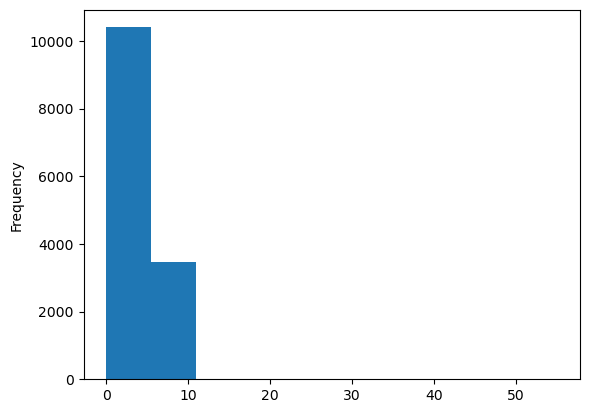

In [131]:
df["consumption_comb"].plot.hist(bins = 10)

<AxesSubplot:ylabel='Frequency'>

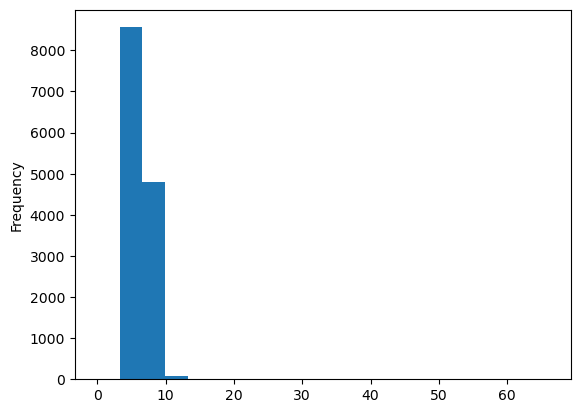

In [132]:
df["consumption_city"].plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

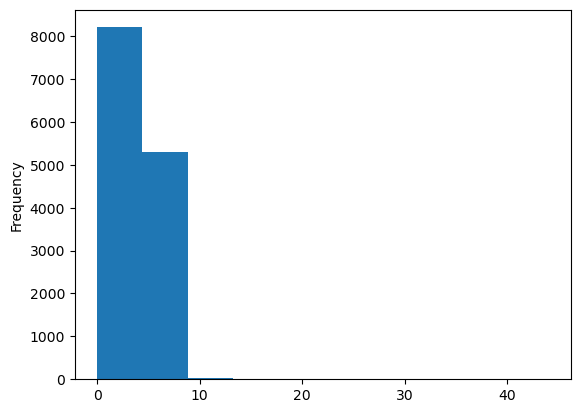

In [133]:
df["consumption_country"].plot.hist(bins = 10)

In [134]:
ignore.add('consumption')

### Explore 'co2_emission'

* Mostly string in a list with extra '\n'

In [135]:
df['co2_emission'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n120 g CO2/km (comb)\n]      740
[[], [], []]                   628
[\n99 g CO2/km (comb)\n]       545
[\n97 g CO2/km (comb)\n]       537
[\n104 g CO2/km (comb)\n]      501
                              ... 
[\n14 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]      1
[\n51 g CO2/km (comb)\n]         1
[\n165 g CO2/km (comb)\n]        1
[\n193 g CO2/km (comb)\n]        1
Name: co2_emission, Length: 123, dtype: int64

In [136]:
df['co2_emission'] = [(re.sub('\n','',x[0]) if x[0].__class__ == str else float('nan')) 
                       if x.__class__ == list else x for x in df['co2_emission']]

In [137]:
df['co2_emission'].value_counts()[100:]
# no. suffixed with "g CO2/km (comb)"

171 g CO2/km (comb)       1
183 g CO2/km (comb)       1
1 g CO2/km (comb)         1
180 g CO2/km (comb)       1
177 g CO2/km (comb)       1
331 g CO2/km (comb)       1
181 g CO2/km (comb)       1
13,983 g CO2/km (comb)    1
184 g CO2/km (comb)       1
14,457 g CO2/km (comb)    1
14 g CO2/km (comb)        1
239 g CO2/km (comb)       1
1,060 g CO2/km (comb)     1
190 g CO2/km (comb)       1
990 g CO2/km (comb)       1
253 g CO2/km (comb)       1
160 g CO2/km (comb)       1
80 g CO2/km (comb)        1
51 g CO2/km (comb)        1
165 g CO2/km (comb)       1
12,324 g CO2/km (comb)    1
193 g CO2/km (comb)       1
Name: co2_emission, dtype: int64

In [138]:
df['co2_emission'] = [x.split(' ')[0] if x.__class__ == str else float('nan') for x in df['co2_emission']]

In [139]:
df['co2_emission'] = [re.sub(',','',x) if x.__class__ == str else x for x in df['co2_emission']]

In [140]:
df['co2_emission'] = df['co2_emission'].astype('float')
# 12,087  13,983 14,457 12,324  1,060 seem too high, all together only 6. drop

<AxesSubplot:ylabel='Frequency'>

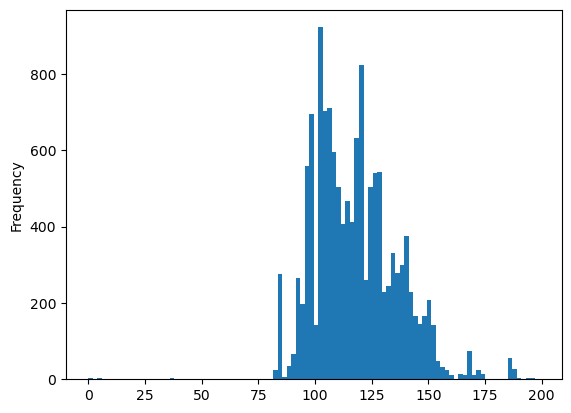

In [141]:
df['co2_emission'][df['co2_emission']<200].plot.hist(bins = 100)

### Explore 'entertainment_media'

* Make a set of entertainment media in the lists
* Make dummy for each in the set, ignore entertainment_media

In [142]:
df['entertainment_media'].value_counts()
# each entry is a list with string entries if not missing

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[On-board computer, Radio]                                                                487
[Radio]                                                                                   477
                                                                                         ... 
[Bluetooth, CD player, MP3]                                                                 1
[CD player, USB]                                                                            1
[Bluetooth, CD player, Digital radio, Radio, USB]                                           1
[Bluetooth, CD player, Digital radio, MP3, On-board computer, Radio, Television, USB]       1
[Hands-free equipment, On-board computer, Radio, Sound syste

In [143]:
df['entertainment_media'] = [','.join(x) if x.__class__==list else x for x in df['entertainment_media']]

In [144]:
df['entertainment_media'].value_counts(dropna=False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

### Explore 'safety_security'

* Features in a list. 
* As with entertainment_media, make a set. Make columns for each in the set. ignore safety_security. 

In [145]:
df['safety_security'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                       480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]      

In [146]:
df['safety_security'] = [','.join(x) if x.__class__==list else x for x in df['safety_security']]

In [147]:
df['safety_security'].value_counts()

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                 480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights                                                          

### Explore 'nr_seats'



In [148]:
df['nr_seats'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_seats, dtype: int64

In [149]:
df['nr_seats'] = [re.sub('\n','',x[0]).strip().lstrip() if x.__class__ == list else x for x in df['nr_seats']]

In [150]:
df['nr_seats'].value_counts(dropna=False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_seats, dtype: int64

In [151]:
to_encode.add('nr_seats')

Explore comfort_convenience

List of features, convert to a binary column of their own, like in safety_features

In [152]:
df['comfort_convenience'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                                      216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [153]:
df['comfort_convenience'] = [','.join(x) if x.__class__ == list else x for x in df['comfort_convenience']]

In [154]:
df['comfort_convenience'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

### Explore 'displacement'

* string in a list. Number has comma and suff of cc
* It is not a continuous variable, should be encoded. 
* We could make these into 5 classes: <500, 500-1000, 1000-1500, 1500-2000, 2000+

In [155]:
df['displacement'].value_counts()[50:]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,580 cc\n]     1
[\n1,995 cc\n]     1
[\n1,333 cc\n]     1
[\n54 cc\n]        1
[\n1,533 cc\n]     1
[\n1,100 cc\n]     1
[\n1,350 cc\n]     1
[\n16,000 cc\n]    1
[\n1,856 cc\n]     1
[\n1,568 cc\n]     1
[\n1,896 cc\n]     1
[\n1,584 cc\n]     1
[\n996 cc\n]       1
[\n1,696 cc\n]     1
[\n1,686 cc\n]     1
[\n15,898 cc\n]    1
[\n1,368 cc\n]     1
[\n140 cc\n]       1
[\n973 cc\n]       1
[\n1,239 cc\n]     1
[\n1,369 cc\n]     1
[\n1,390 cc\n]     1
[\n122 cc\n]       1
[\n1,198 cc\n]     1
[\n1,195 cc\n]     1
[\n2,967 cc\n]     1
[\n1,800 cc\n]     1
Name: displacement, dtype: int64

In [156]:
df['displacement'] = [int(re.sub('\n| cc|,','',x[0])) if x.__class__ == list else float('nan') for x in df['displacement']]

In [157]:
df['displacement'].value_counts(dropna=False)

1598.0    4761
999.0     2438
1398.0    1314
1399.0     749
1229.0     677
          ... 
122.0        1
1198.0       1
1195.0       1
2967.0       1
1800.0       1
Name: displacement, Length: 78, dtype: int64

### Explore 'nr_doors'
 
Number of doors 1 - 7, encode

In [158]:
df['nr_doors'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: nr_doors, dtype: int64

In [159]:
df['nr_doors'] = [re.sub('\n','',x[0]).lstrip().strip() if x.__class__ == list else x for x in df['nr_doors']]

In [160]:
df['nr_doors'].value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_doors, dtype: int64

In [161]:
to_encode.add('nr_doors')

### Explore body_type, body

* body_type is cleaned version of body
* ignore body
* encode body_type

In [162]:
df['body'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [163]:
df['body_type'].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [164]:
df['body_type'] = [x.lower() if x.__class__ == str else x for x in df['body_type']]

In [165]:
ignore.add('body')
to_encode.add('body_type')

### Explore 'short_description'

* Very little overlap in descriptions. Will ignore this column.


In [166]:
df['short_description'].value_counts()

SPB 1.6 TDI 116 CV S tronic Sport                 64
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
SPB 30 TFSI S tronic Admired                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10001, dtype: int64

In [167]:
ignore.add('short_description')

### Explore 'description'

* Description seems to be in German. 
* It will take a lot of time to translate this to be able to use as features. I will ignore this for now.

In [168]:
ignore.add('description')

### Explore 'fuel'

* The entries seem to be in the list at index 1 rather than 0
* This classification seems to be misleading. Make a set of all entries in the list, separated by '/'
* There are 27 classes. Too many. 
* Collapse to diesel, petrol, LPG and other later on.

In [169]:
df['fuel'].value_counts(dropna=False)[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
[\n, Regular/Benzine 91, \n]                                                                                            354
[\n, Super E10 95, \n]                                                                                                  331
[\n, Super 95 (Particulate Filter), \n]                                                                                 268
[\n, Sup

In [170]:
df['fuel'] = [[y.lstrip().strip() for y in x[1].split('/')] if re.search('/',x[1]) else x[1]
                 if x.__class__ == list else x for x in df['fuel']]

In [171]:
df['fuel'] = [','.join(x) if x.__class__ == list else x for x in df['fuel']]

In [172]:
df['fuel'].value_counts(dropna=False)

Diesel (Particulate Filter)                                                                        4315
Super 95                                                                                           3338
Gasoline                                                                                           3175
Diesel                                                                                             2984
Super 95,Regular,Benzine 91                                                                         424
                                                                                                   ... 
Regular,Benzine 91,Super 95,Regular,Benzine E10 91                                                    1
Super Plus 98,Super E10 95                                                                            1
Regular,Benzine 91,Super 95,Regular,Benzine E10 91,Super E10 95,Super Plus 98,Super Plus E10 98       1
Regular,Benzine 91,Super Plus 98,Regular,Benzine E10 91,Super 95

In [173]:
to_encode.add('fuel')

### Explore 'gearing_type'

* Simplify from list to string
* add to to_encode

In [174]:
df['gearing_type'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [175]:
df['gearing_type'] = [x[1].lstrip().strip().lower() if x.__class__ == list else x for x in df['gearing_type']]

In [176]:
df['gearing_type'].value_counts()

manual            8153
automatic         7297
semi-automatic     469
Name: gearing_type, dtype: int64

In [177]:
to_encode.add('gearing_type')

### Explore 'make', 'model', 'make_model'

* encode make_model
* ignore make, model

In [178]:
df['make'].value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [179]:
df['model'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [180]:
df['model'][df['make'] == 'Audi'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]    3097
[\n, A1, \n]    2614
[\n, A2, \n]       1
Name: model, dtype: int64

In [181]:
df['make_model'][df['make'] == 'Audi'].value_counts()

Audi A3    3097
Audi A1    2614
Audi A2       1
Name: make_model, dtype: int64

In [182]:
df['make_model'].value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [183]:
df['make_model'] = [re.sub('\s|-','_',x.lower()) if x.__class__ == str else x for x in df['make_model']]
df['make_model'].value_counts()

audi_a3           3097
audi_a1           2614
opel_insignia     2598
opel_astra        2526
opel_corsa        2219
renault_clio      1839
renault_espace     991
renault_duster      34
audi_a2              1
Name: make_model, dtype: int64

In [184]:
to_encode.add('make_model')

In [185]:
ignore.add('make') 
ignore.add('model')

### Explore 'null'

* ignore null

In [186]:
df['null'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

In [187]:
ignore.add('null')

### Explore 'hp' 

* horse power
* Consistent suffix kW
* Continuous variable, replace with numbers, remove kW

In [188]:
df['hp'].value_counts(dropna=False)[:50]

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
Name: hp, dtype: int64

In [189]:
df['hp'] = [re.sub('[A-Za-z]','',x) for x in df['hp']]
df['hp'] = [re.sub('-','',x.lstrip().strip()) for x in df['hp']]
df['hp'] = [float('nan') if x == '' else int(x) for x in df['hp']]

In [190]:
df['hp'].value_counts()

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
         ... 
137.0       1
9.0         1
44.0        1
133.0       1
239.0       1
Name: hp, Length: 80, dtype: int64

### Explore 'registration', 'first_registration'

* Making new variable: registration_continuous as a float 
* first_registration is cleaned registration_years

In [191]:
df['registration'].value_counts()

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [192]:
temp = [x.split('/')[1] if x.__class__ == str else x for x in df['registration']]
temp = [float('nan') if x=='-' else int(x) for x in temp]
df['registration_year'] = temp.copy()

In [193]:
df['registration_year'].value_counts()

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
Name: registration_year, dtype: int64

In [194]:
df['first_registration'] = df['registration_year'].copy()

In [195]:
df['registration_year'] = [float(x) for x in df['registration_year']]

In [196]:
temp = [x.split('/')[0] if x.__class__ == str else x for x in df['registration']]
temp = [float('nan') if x=='-' else int(x) for x in temp]
df['registration_month'] = temp.copy()

In [197]:
df['registration_month'].value_counts()

3.0     2245
2.0     1964
4.0     1959
5.0     1875
1.0     1734
6.0     1617
7.0      793
8.0      494
9.0      436
11.0     433
10.0     411
12.0     361
Name: registration_month, dtype: int64

In [198]:
df['reg_cont'] = df['registration_year'] + df['registration_month']/12

In [199]:
df['reg_cont'].value_counts()

2018.250000    695
2019.166667    585
2018.416667    572
2019.250000    543
2018.333333    541
2019.083333    541
2018.166667    539
2016.250000    536
2016.333333    532
2018.500000    532
2018.083333    511
2019.333333    506
2016.166667    472
2017.250000    471
2016.416667    459
2016.500000    452
2019.416667    440
2017.500000    409
2017.416667    404
2018.583333    396
2017.333333    380
2016.083333    376
2017.166667    368
2017.083333    306
2018.666667    285
2019.500000    224
2017.583333    215
2017.916667    180
2016.583333    176
2016.833333    160
2017.833333    154
2017.750000    149
2016.916667    142
2018.750000    141
2016.750000    141
2017.000000    134
2018.000000    123
2017.666667    114
2018.916667    110
2019.000000    103
2018.833333     97
2016.666667     94
2019.583333      6
2019.750000      5
2019.666667      1
2019.916667      1
2020.000000      1
Name: reg_cont, dtype: int64

In [200]:
df['first_registration'].value_counts()

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
Name: first_registration, dtype: int64

In [201]:
ignore.add('registration')
ignore.add('registration_year')
ignore.add('registration_month')
to_encode.add('first_registration')

### Explore 'km'

* make integers by removing string characters

In [202]:
df['km'].value_counts()

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [203]:
df['km'] = [re.sub(',| km|-','',x).lstrip().strip() for x in df['km']]
df['km'] = [float('nan') if x=='' else int(x) for x in df['km']]
df['km'].value_counts()

10.0       1045
1.0         367
5.0         170
50.0        148
100.0       139
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6689, dtype: int64

<AxesSubplot:ylabel='Frequency'>

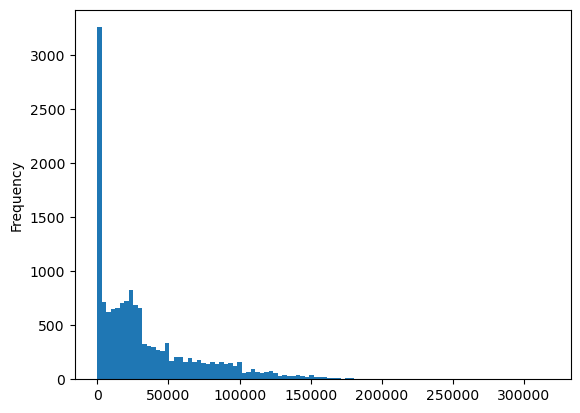

In [204]:
df['km'].plot.hist(bins=100)

### Explore 'price'

In [205]:
df['price'].value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

<AxesSubplot:ylabel='Frequency'>

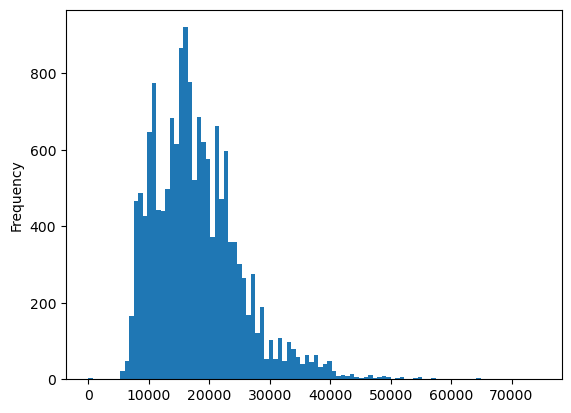

In [206]:
df['price'].plot.hist(bins = 100)

### Explore 'url'

In [207]:
ignore.add('url')

## Save the selected features as a new dataset

In [208]:
df2 = pd.DataFrame()

In [209]:
for i in df.columns:
    if i not in ignore:
        df2[i] = df[i]

In [210]:
df2.to_json('data_post00.json', orient='records', lines=True)

In [211]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   km                   14895 non-null  float64
 4   prev_owner           9091 non-null   object 
 5   hp                   15831 non-null  float64
 6   type                 15917 non-null  object 
 7   first_registration   14322 non-null  float64
 8   body_color           15322 non-null  object 
 9   paint_type           10147 non-null  object 
 10  nr_doors             15707 non-null  object 
 11  nr_seats             14942 non-null  object 
 12  gearing_type         15919 non-null  object 
 13  displacement         15423 non-null  float64
 14  cylinders            10239 non-null  object 
 15  weight               8945 non-null  

In [212]:
print(ignore)

{'vat', 'last_timing_belt_service_date', 'make', 'null', 'body_color_original', 'non_smoking_vehicle', 'kw', 'model_code', 'previous_owners', 'body', 'model', 'warranty', 'next_inspection', 'upholstery', 'emission_label', 'last_service_date', 'offer_number', 'registration_month', 'electricity_consumption', 'availability', 'available_from', 'full_service', 'description', 'inspection_new', 'other_fuel_types', 'url', 'registration', 'short_description', 'registration_year', 'consumption'}


## Summary 
We started with 54 features. 

We dropped many features. Replaced some with better versions. Consumption with three columns - city, country, comb; upholstery with two - color and material; registration with registration_continuous; vat with a binary for var_deductible; and warranty with warranty_mo.

Finally we have 34 features.

<a id="3"></a>

## End of Data Cleaning

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Next: [Data Imputation](02_data_imputation.ipynb)